## CAT Scan Location Prediction

Given data about various CAT scans, let's try to predict the *location on the body* from where a given scan was taken.

We will use a tensorflow/keras neural network to make our predictions. 

### Getting Started

In [22]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.6 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 1.6 MB/s eta 0:00:000:00:01m eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [55]:
import numpy as np
import pandas as pd
import matplotlib as mtp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf

In [2]:
data = pd.read_csv('slice_localization_data.csv')
data

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.980381,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.803851
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.745726
2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.687600
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.629474
4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.976833,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.571348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53495,96,0.591906,0.357764,0.000000,0.000000,0.552321,0.795304,0.946697,0.952227,0.84395,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,29.290398
53496,96,0.612313,0.000000,0.000000,0.000000,0.864160,0.820531,0.000000,0.938813,0.94374,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,27.945721
53497,96,0.612313,0.000000,0.000000,0.000000,0.864160,0.820531,0.000000,0.938813,0.94374,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,27.945721
53498,96,0.634921,0.904555,0.956087,0.980208,0.157664,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.000000,0.0,0.994967,0.806688,0.0,0.0,-0.25,-0.25,14.582997


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53500 entries, 0 to 53499
Columns: 386 entries, patientId to reference
dtypes: float64(385), int64(1)
memory usage: 157.6 MB


### Preprocessing

In [57]:
def preprocess_inputs(df):
    df = df.copy()
    # drop patient id column
    df = df.drop('patientId', axis=1)

    # Split df into X and y
    y = df['reference']
    X = df.drop('reference', axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [58]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [59]:
X_train.describe()

,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,...,value374,value375,value376,value377,value378,value379,value380,value381,value382,value383
count,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.00000,37450.000000,...,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000
mean,0.059190,0.071638,0.147057,0.218527,0.274152,0.421645,0.364674,0.249620,0.16558,0.014812,...,0.204240,0.183464,0.183695,0.320226,0.359270,0.344180,0.265875,0.267872,0.175467,0.079627
std,0.173515,0.196934,0.301534,0.359447,0.378961,0.296441,0.281890,0.233329,0.21407,0.080492,...,0.060428,0.071328,0.383887,0.463548,0.478132,0.472092,0.437623,0.225972,0.078276,0.102695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.200567,0.200107,0.200000,0.00000,0.000000,...,0.200280,0.207732,0.000000,0.000000,0.000000,0.000000,0.000000,0.200024,0.200507,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.200567,0.200107,0.200000,0.20000,0.000000,...,0.200280,0.207732,0.000000,0.000000,0.000000,0.000000,0.000000,0.200024,0.200507,0.000000
75%,0.000000,0.000000,0.000000,0.443693,0.680530,0.729662,0.560171,0.200000,0.20000,0.000000,...,0.200280,0.207732,0.000000,0.996216,0.999686,0.999563,0.951105,0.200024,0.200507,0.209582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
y_train

36958    53.168322
20128    78.796527
33249    34.740313
33896    29.947560
15142    15.880591
           ...    
50057    74.919418
32511    23.360237
5192     63.332494
12172    68.634920
33003    55.135923
Name: reference, Length: 37450, dtype: float64

### Training

In [48]:
X_train.shape

(37450, 384)

In [66]:
inputs = tf.keras.Input(shape=384,)
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss = 'mse'
)

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights = True
        )
    ]
)

Epoch 1/100
937/937 [==============================] - 6s 6ms/step - loss: 136.1535 - val_loss: 28.1193
Epoch 2/100
937/937 [==============================] - 4s 4ms/step - loss: 17.9334 - val_loss: 13.3855
Epoch 3/100
937/937 [==============================] - 4s 4ms/step - loss: 9.3755 - val_loss: 7.5615
Epoch 4/100
937/937 [==============================] - 3s 4ms/step - loss: 6.1358 - val_loss: 5.3219
Epoch 5/100
937/937 [==============================] - 4s 4ms/step - loss: 4.5049 - val_loss: 4.9553
Epoch 6/100
937/937 [==============================] - 3s 3ms/step - loss: 3.5695 - val_loss: 3.4934
Epoch 7/100
937/937 [==============================] - 4s 4ms/step - loss: 2.7440 - val_loss: 3.4203
Epoch 8/100
937/937 [==============================] - 3s 3ms/step - loss: 2.3248 - val_loss: 4.2698
Epoch 9/100
937/937 [==============================] - 5s 5ms/step - loss: 1.9952 - val_loss: 3.0526
Epoch 10/100
937/937 [==============================] - 4s 4ms/step - loss: 1.7525 - v

### Results

<Axes: ylabel='Frequency'>

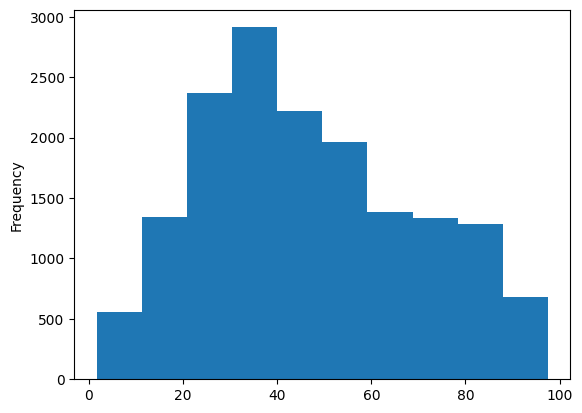

In [24]:
y_test.plot(kind='hist')

In [67]:
y_pred = np.squeeze(model.predict(X_test))
y_pred

502/502 [==============================] - 1s 2ms/step


array([40.088573, 27.046122, 24.85547 , ..., 27.159388, 83.144455,
       35.263977], dtype=float32)

In [68]:
y_pred.shape

(16050,)

In [69]:
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE: {:.5f}".format(rmse))

RMSE: 0.84673


In [70]:
np.sum((y_test - y_test.mean())**2)

8022031.62708539

In [71]:
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
print("R^2 Score: {:.5f}".format(r2))

R^2 Score: 0.99857
